## 7.1 深度卷积神经网络

### 7.1.1 学习表征

2012年的AlexNet设计了一种特征提取器，能够学习到了一些类似于传统滤波器的特征提取器。下图是其第一层学习到的特征提取器。

![](../images/7-1-1.png)

#### 7.1.1.1 缺少的成分：数据

ImageNet的挑战赛推动了计算机视觉和机器学习研究的发展，也就是ImageNet数据集上训练模型。

#### 7.1.1.2 缺少的成分：硬件

GPU很强。

### 7.1.2 AlexNet

下面是AlexNet的样子

![](../images/7-1-2.svg)

AlexNet的设计理念和LeNet很像，但是也有差异。

1. AlexNet比相对较小的LeNet5要深得多。AlexNet由八层组成：五个卷积层、两个全连接隐藏层和一个全连接输出层。
2. AlexNet使用ReLU而不是sigmoid作为其激活函数。

#### 7.1.2.1 模型设计

由于ImageNet数据集的图像比MNIST大很多，因此需要一个更大的卷积核来捕获特征，而且使用了很多的通道。

原来的AlexNet还使用了双数据流的形式减少单个GPU显存占用，但是现在不必了已经。

#### 7.1.2.2 激活函数

用Relu替代了Sigmoid，更简单也更有效。

#### 7.1.2.3 容量控制和预处理

AlexNet通过暂退法控制全连接层的模型复杂度，并且其在训练前使用图像增强手段扩充了大量的数据，使得模型更加鲁棒，显著减少了过拟合。

在下面的模型设定中，使用了`nn.Dropout`以防止过拟合，它将回把上一层的输出按照一定概率置零，并送入下一层。在`train`阶段它将启用，但是在`eval`阶段其将不会启用。

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

net = nn.Sequential(
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    nn.Linear(6400, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 1000),
)

观察一下每一层的输出

In [2]:
X = torch.randn(1, 1, 224, 224)
for layer in net:
    X=layer(X)
    print(layer.__class__.__name__,'output shape:\t',X.shape)

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

### 7.1.3 读取数据集

ImageNet过大了，所以还是用Fashion-MNIST，但是要将其缩放到224（这并不明智，但是只是为了有效使用AlexNet）。

In [3]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

### 7.1.4 训练AlexNet

loss 0.337, train acc 0.875, test acc 0.881
4436.6 examples/sec on cuda:1


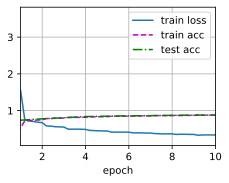

In [6]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu(1))

### 7.1.5 小结

- AlexNet的架构与LeNet相似，但使用了更多的卷积层和更多的参数来拟合大规模的ImageNet数据集。
- 今天，AlexNet已经被更有效的架构所超越，但它是从浅层网络到深层网络的关键一步。
- 尽管AlexNet的代码只比LeNet多出几行，但学术界花了很多年才接受深度学习这一概念，并应用其出色的实验结果。这也是由于缺乏有效的计算工具。
- Dropout、ReLU和预处理是提升计算机视觉任务性能的其他关键步骤。